# Домашнее задание № 2
# "Функции потерь и оптимизация"

* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее
    * Методом nesterov momentum
    * Методом rmsprop
* Задание со звездочкой - доработать код логистической регрессии из первого занятия и обучить ее теми же методами для задачи классификации Ирисов (взять только два цветка - Iris Versicolor и Iris Virginica)

## Линейная регрессия

In [31]:
import numpy as np
# from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style()

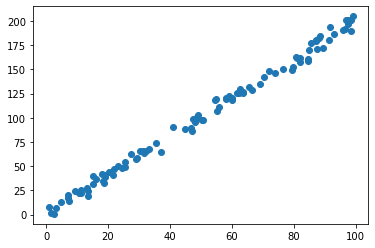

In [32]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)
plt.scatter(X, Y)
plt.show()
theta0, theta1 = np.random.normal(size=(2,))

In [33]:
def predict_proba(theta0, theta1, X):
    return theta0 + (theta1 * X)

In [34]:
def mse_loss(theta0, theta1, X, Y):
    probas = predict_proba(theta0, theta1, X)
    loss = np.sum(np.square(probas - Y)) / (2 * len(probas))
    return loss

In [35]:
def grad(theta0, theta1, X, Y):
    probas = predict_proba(theta0, theta1, X)
    der_theta0 =  np.sum(probas - Y) / len(probas)
    der_theta1 = np.sum((probas - Y) * X) / len(probas)
    return der_theta0, der_theta1

def der_theta1(X, Y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [73]:
# Градиентный спуск
def learn_sgd(theta0, theta1, X, Y, num_epochs=20, learning_rate=0.0001):
    predict = []
    losses = []
    print ("Градиентный спуск")
    for e in range(num_epochs):
        dt0, dt1 = grad(theta0, theta1, X, Y)            
        theta0 -= learning_rate * dt0
        theta1 -= learning_rate * dt1
        loss = mse_loss(theta0, theta1, X, Y)
        losses.append(loss)
        pred = predict_proba(theta0, theta1, X)
        predict.append(pred)
        print("t0:", theta0, "t1:", theta1, "mse_loss:", loss)
    return losses, theta0, theta1, predict


In [74]:
# Метод Nesterov Accelerated Gradient
def learn_NR(theta0, theta1, X, Y, num_epochs=20, nabla=0.0001, gamma=0.9):
    predict = []
    losses = []
    vt0, vt1 = 0., 0.
    print()
    print( "Метод Nesterov Accelerated Gradient")
    for e in range(num_epochs):
        dt0, dt1 = grad(theta0, theta1, X, Y)
        vt0 = gamma * vt0 + nabla * dt0
        vt1 = gamma * vt1 + nabla * dt1
        theta0 -= vt0
        theta1 -= vt1        
        loss = mse_loss(theta0, theta1, X, Y)
        losses.append(loss)
        pred = predict_proba(theta0, theta1, X)
        predict.append(pred)
        print("t0:", theta0, "t1:", theta1, "mse_loss:", loss)
    return losses, theta0, theta1, predict


In [75]:
# Метод RMSProp
def learn_RMSProp(theta0, theta1, X, Y, num_epochs=20, nabla=0.1, gamma=0.95):
    predict = []
    losses = []
    vt0, vt1 = 0., 0.
    print()
    print( "Метод RMSProp")
    for e in range(num_epochs):
        dt0, dt1 = grad(theta0, theta1, X, Y)
        vt0 = gamma * vt0 + (1-gamma) * dt0**2
        vt1 = gamma * vt1 + (1-gamma) * dt1**2
        theta0 -= nabla * dt0 / (vt0**0.5+ 10**(-6))
        theta1 -= nabla * dt1 / (vt1**0.5 + 10**(-6))    
        loss = mse_loss(theta0, theta1, X, Y)
        losses.append(loss)
        pred = predict_proba(theta0, theta1, X)
        predict.append(pred)
        print("t0:", theta0, "t1:", theta1, "mse_loss:", loss)
    return losses, theta0, theta1, predict

Градиентный спуск
t0: 2.079655940692471 t1: 1.1046986303136186 mse_loss: 1359.031592416944
t0: 2.084086963813395 t1: 1.4129321660761083 mse_loss: 576.186512040674
t0: 2.0869489071827765 t1: 1.6125496024178843 mse_loss: 247.85503547692562
t0: 2.0887946877897616 t1: 1.741825389416192 mse_loss: 110.15019137301846
t0: 2.0899823841620444 t1: 1.825546717555631 mse_loss: 52.39567812434991
t0: 2.0907438940971437 t1: 1.8797661966288923 mse_loss: 28.17297164053521
t0: 2.0912293985870343 t1: 1.9148797721271156 mse_loss: 18.013772498023176
t0: 2.091536157418532 t1: 1.9376200366972578 mse_loss: 13.752920561454676
t0: 2.091727157698107 t1: 1.952347132837998 mse_loss: 11.965882512043095
t0: 2.091843190956475 t1: 1.9618847636315913 mse_loss: 11.216381748097128
t0: 2.0919106744887177 t1: 1.9680616076359416 mse_loss: 10.902032401373347
t0: 2.0919467165883256 t1: 1.972061948456911 mse_loss: 10.770189031688338
t0: 2.091962396879657 t1: 1.9746527484745482 mse_loss: 10.714890125317334
t0: 2.0919648907175166

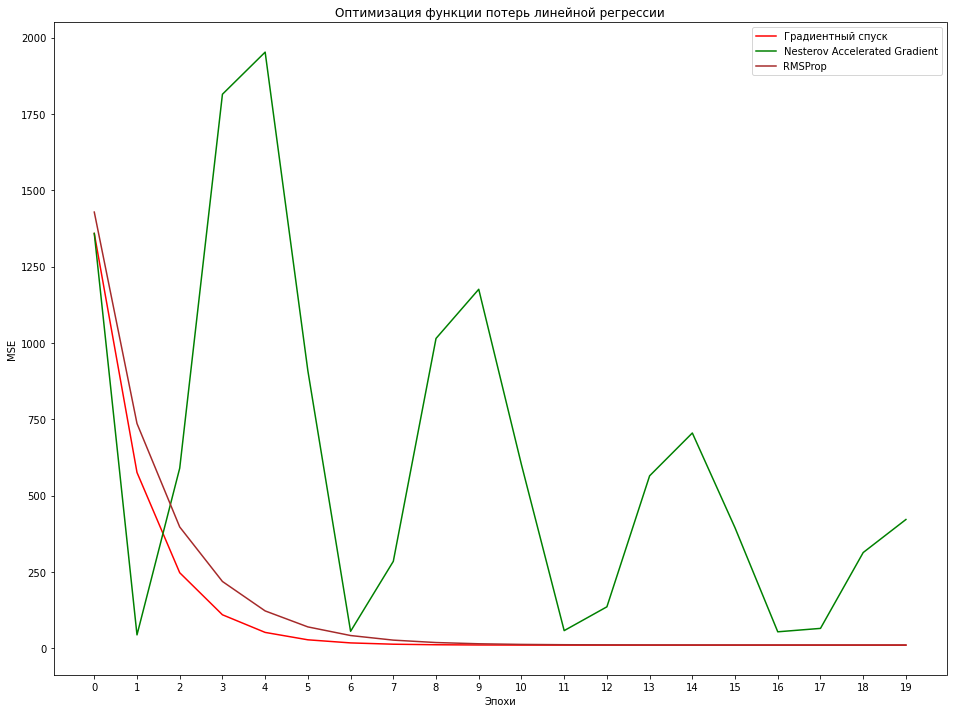

In [76]:
losses_sgd, theta0_sgd, theta1_sgd, predict_sgd = learn_sgd(theta0, theta1, X, Y)
losses_nr, theta0_nr, theta1_nr, predict_nr = learn_NR(theta0, theta1, X, Y)
losses_rms, theta0_rms, theta1_rmsr, predict_rms = learn_RMSProp(theta0, theta1, X, Y)
fig, axes = plt.subplots(figsize=(16,12))
axes.set_xticks(np.arange(0, 20, 1))
axes.set_title('Оптимизация функции потерь линейной регрессии')
axes.set_xlabel("Эпохи")
axes.set_ylabel('MSE')
axes.plot(losses_sgd, 'r', label='Градиентный спуск')
plt.plot(losses_nr, 'g', label='Nesterov Accelerated Gradient')
plt.plot(losses_rms, 'brown', label='RMSProp')
axes.legend()
plt.show()

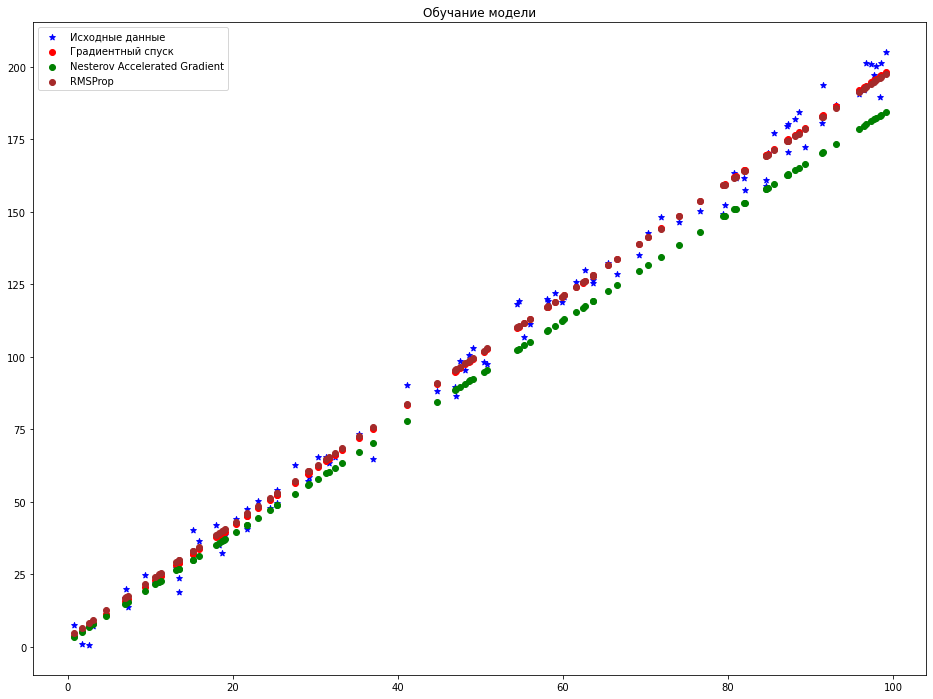

In [77]:
# predict_sgd = learn_sgd(theta0, theta1, X, Y)[3]
fig, axes = plt.subplots(figsize=(16,12))
axes.set_title('Обучание модели')
axes.scatter(X, Y, color='blue', marker = '*', label="Исходные данные")
axes.scatter(X, predict_sgd[19], color='red', label='Градиентный спуск')
axes.scatter(X, predict_nr[losses_nr.index(min(losses_nr))], color='green', label='Nesterov Accelerated Gradient')
axes.scatter(X, predict_rms[losses_rms.index(min(losses_rms))], color='brown', label='RMSProp')
axes.legend()
plt.show()

## Логистическая регрессия

In [678]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [679]:
data = load_iris()
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [680]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [681]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [709]:
# Взять только два цветка - Iris Versicolor и Iris Virginica
X = df.iloc[50:, [0, 1, 2, 3]].values
y = df.iloc[50:, 4].values

In [710]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(100, 4)

In [684]:
y.shape

(100,)

In [685]:
COEFS = np.random.randn(5)

In [686]:
COEFS

array([-0.06440339,  1.08451921,  0.37166824,  1.04949272, -0.03637885])

In [687]:
def predict_proba(coefs, x):
    return 1. / (1. + np.exp( -(x.dot(coefs[:4]) + coefs[-1])))

In [688]:
def predict_class(coefs, x):
    probas = predict_proba(coefs, x)
    return np.where(probas > 0.5, 2, 1)

In [689]:
def bce_loss(coefs, x, y):
    probas = predict_proba(coefs, x)
    filter_ones = y == 1
    loss = -1. * (np.sum(np.log(probas[filter_ones])) + np.sum(np.log(1. - probas[~filter_ones]))) / len(y)
    return loss

In [690]:
def grad(coefs, x, y):
    probas = predict_proba(coefs, x)
    delta = probas - y
    modified_x = x.T * delta
    deltas = np.mean(modified_x, axis=1)
    return deltas, np.mean(delta)

In [721]:
# Градиентный спуск
def learn_sgd(coefs, x, y, num_epochs=20, learning_rate=0.0001):
    losses = []
    print ("Градиентный спуск")
    print()
    for e in range(num_epochs):
        grad_coefs, grad_bias = grad(coefs, x, y)
        coefs[:-1] = coefs[:-1] - learning_rate * grad_coefs
        coefs[-1] = coefs[-1] - learning_rate * grad_bias
        loss = bce_loss(coefs, x, y)
        losses.append(loss)
    return losses, coefs


In [722]:
# Метод Nesterov Accelerated Gradient
def learn_NR(coefs, x, y, num_epochs=20, nabla=0.0001, gamma=0.95):
    losses = []
    vt0, vt1 = 0., 0.
    print( "Метод Nesterov Accelerated Gradient")
    print()
    for e in range(num_epochs):
        grad_coefs, grad_bias = grad(coefs, x, y)
        vt0 = gamma * vt0 + nabla * grad_coefs
        vt1 = gamma * vt1 + nabla * grad_bias        
        coefs[:-1] -=  vt0
        coefs[-1] -= vt1
        loss = bce_loss(coefs, x, y)
        losses.append(loss)
    return losses, coefs

In [723]:
# Метод RMSProp
def learn_RMSProp(coefs, x, y, num_epochs=20, nabla=0.1, gamma=0.95):
    losses = []
    vt0, vt1 = 0., 0.
    print( "Метод RMSProp")
    print()
    for e in range(num_epochs):
        grad_coefs, grad_bias = grad(coefs, x, y)
        vt0 = gamma * vt0 + (1-gamma) * grad_coefs**2
        vt1 = gamma * vt1 + (1-gamma) * grad_bias**2
        coefs[:-1] -= nabla * grad_coefs / (vt0**0.5+ 10**(-6))
        coefs[-1] -= nabla * grad_bias / (vt1**0.5 + 10**(-6))
        loss = bce_loss(coefs, x, y)
        losses.append(loss)
    return losses, coefs

In [724]:
losses, new_coefs = learn_sgd(COEFS, X, y, num_epochs=20, learning_rate=0.0001)
print(new_coefs)
losses

Градиентный спуск

[-0.01465495  0.45233277  0.99387363  1.6763802   0.63814478]


[2.5408223222518074,
 2.540835499185875,
 2.540848677335788,
 2.540861856701548,
 2.540875037283156,
 2.540888219080616,
 2.5409014020939322,
 2.540914586323103,
 2.5409277717681333,
 2.5409409584290255,
 2.540954146305782,
 2.5409673353984044,
 2.5409805257068925,
 2.5409937172312542,
 2.5410069099714896,
 2.541020103927599,
 2.541033299099588,
 2.5410464954874565,
 2.541059693091208,
 2.541072891910845]

In [725]:
predict_class(new_coefs, X)

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [726]:
predict_proba(new_coefs, X)

array([0.43189638, 0.47349407, 0.55727515, 0.06215387, 0.36962119,
       0.19304442, 0.66180534, 0.00994298, 0.23277044, 0.13179685,
       0.00733582, 0.32492447, 0.01709642, 0.33984484, 0.08467735,
       0.31711786, 0.41057454, 0.03757578, 0.18726195, 0.0336591 ,
       0.81121109, 0.1146403 , 0.35978679, 0.16883604, 0.17490379,
       0.28875285, 0.33288377, 0.73345348, 0.37587331, 0.01624734,
       0.02627208, 0.01582423, 0.06345969, 0.58473688, 0.41165047,
       0.63937558, 0.49814291, 0.09554086, 0.16262183, 0.0801192 ,
       0.09825324, 0.34336029, 0.06253704, 0.00866517, 0.12700281,
       0.12822729, 0.16020535, 0.17554606, 0.01171562, 0.1284969 ,
       0.99702357, 0.82297437, 0.97536957, 0.8815381 , 0.9814365 ,
       0.98917127, 0.44130791, 0.94437009, 0.84470791, 0.99821207,
       0.93091512, 0.85386986, 0.96089195, 0.82364816, 0.97482682,
       0.98262123, 0.8827013 , 0.99781305, 0.99407257, 0.29765321,
       0.98909782, 0.86204254, 0.98135844, 0.70824824, 0.97927

In [727]:
losses, new_coefs = learn_NR(COEFS, X, y, num_epochs=20, nabla=0.0001, gamma=0.95)
print(new_coefs)
losses

Метод Nesterov Accelerated Gradient

[-0.01465406  0.45133159  0.99490364  1.67741411  0.65279625]


[2.541086091946371,
 2.541111834953178,
 2.54114949936362,
 2.5411984970459462,
 2.5412582713758236,
 2.541328295430582,
 2.5414080702974586,
 2.54149712348772,
 2.5415950074493066,
 2.541701298171096,
 2.5418155938725158,
 2.541937513772638,
 2.5420666969334174,
 2.542202801172058,
 2.5423455020379166,
 2.5424944918497148,
 2.5426494787890714,
 2.542810186046737,
 2.5429763510181136,
 2.543147724544961]

In [728]:
predict_class(new_coefs, X)

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [729]:
predict_proba(new_coefs, X)

array([0.4350218 , 0.4766662 , 0.56060934, 0.0629941 , 0.37290205,
       0.19514665, 0.66468946, 0.01006588, 0.23514757, 0.13331851,
       0.00743751, 0.32777103, 0.01733146, 0.34291008, 0.08561275,
       0.31986422, 0.41380276, 0.03803069, 0.18966989, 0.03408796,
       0.81331994, 0.11594724, 0.36332737, 0.17073136, 0.17677138,
       0.29142079, 0.33601381, 0.73626727, 0.37907542, 0.01644117,
       0.026614  , 0.01602658, 0.06422139, 0.58842984, 0.41488113,
       0.64222042, 0.50146133, 0.0968298 , 0.16430829, 0.08113618,
       0.09947142, 0.34634374, 0.06331378, 0.00877506, 0.1284921 ,
       0.12959883, 0.16192966, 0.177419  , 0.0118551 , 0.12995274,
       0.99707285, 0.82528789, 0.97576403, 0.883172  , 0.98173775,
       0.98935636, 0.44508949, 0.94523678, 0.84695096, 0.99824034,
       0.93185427, 0.85588137, 0.96149054, 0.82605877, 0.97523781,
       0.98288698, 0.88427752, 0.99784635, 0.99418639, 0.30108685,
       0.98927094, 0.86389359, 0.98168333, 0.71143399, 0.97958

In [730]:
losses, new_coefs = learn_RMSProp(COEFS, X, y, num_epochs=20, nabla=0.01, gamma=0.95)
print(new_coefs)
losses

Метод RMSProp

[-0.00832951  0.10772869  1.34976113  2.03703616  1.02241907]


[2.6175510453996536,
 2.6325936538719055,
 2.6637947386202585,
 2.690688318289225,
 2.715238091789628,
 2.7380457575031976,
 2.7595220033591614,
 2.779942679279366,
 2.7995046190211226,
 2.81835377182475,
 2.8366017925326013,
 2.8543362721622474,
 2.8716273630751323,
 2.888532234970935,
 2.9050981699130345,
 2.9213647713647264,
 2.937365578238101,
 2.953129268466424,
 2.9686805726681187,
 2.9840409787819326]

In [731]:
predict_class(new_coefs, X)

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [732]:
predict_proba(new_coefs, X)

array([0.36611216, 0.40419706, 0.55734779, 0.07907173, 0.41214452,
       0.1864447 , 0.61216134, 0.00661969, 0.21622688, 0.11884417,
       0.00805122, 0.28095724, 0.01908058, 0.34633686, 0.05125505,
       0.25528313, 0.3910311 , 0.026332  , 0.32940793, 0.02876276,
       0.82595065, 0.09113015, 0.51068671, 0.16360061, 0.14452373,
       0.24938291, 0.37466787, 0.79062035, 0.38211746, 0.00968486,
       0.02377448, 0.01260002, 0.04857006, 0.71549657, 0.39163276,
       0.54093339, 0.47609279, 0.14089637, 0.11262486, 0.08394226,
       0.1013671 , 0.31713743, 0.05503489, 0.00640108, 0.11946526,
       0.08446806, 0.12634269, 0.14483631, 0.0067461 , 0.10616327,
       0.99902328, 0.91456532, 0.99125408, 0.94098085, 0.99366698,
       0.99719707, 0.59076506, 0.98028852, 0.95085043, 0.9992396 ,
       0.95286813, 0.93653818, 0.983323  , 0.93242475, 0.99194308,
       0.99169339, 0.93306524, 0.99886459, 0.9992538 , 0.52828077,
       0.9956504 , 0.92818302, 0.99589028, 0.82545747, 0.98906